In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [6]:
pca = PCA(n_components=3)  # Reduce to 3 principal components
principalComponents = pca.fit_transform(iris_df.iloc[:, 0:4])
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, iris_df[['target', 'species']]], axis=1)

In [7]:
# print(finalDf)
print(finalDf.describe())

       principal component 1  principal component 2  principal component 3  \
count           1.500000e+02           1.500000e+02           1.500000e+02   
mean           -2.842171e-15          -8.763360e-16          -3.375078e-16   
std             2.056269e+00           4.926162e-01           2.796596e-01   
min            -3.223804e+00          -1.265971e+00          -6.941468e-01   
25%            -2.530348e+00          -3.254152e-01          -2.054996e-01   
50%             5.546193e-01          -2.215678e-02           1.639215e-02   
75%             1.550143e+00           3.249152e-01           1.758214e-01   
max             3.795645e+00           1.374165e+00           7.601654e-01   

           target  
count  150.000000  
mean     1.000000  
std      0.819232  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000  


<Figure size 1000x800 with 0 Axes>

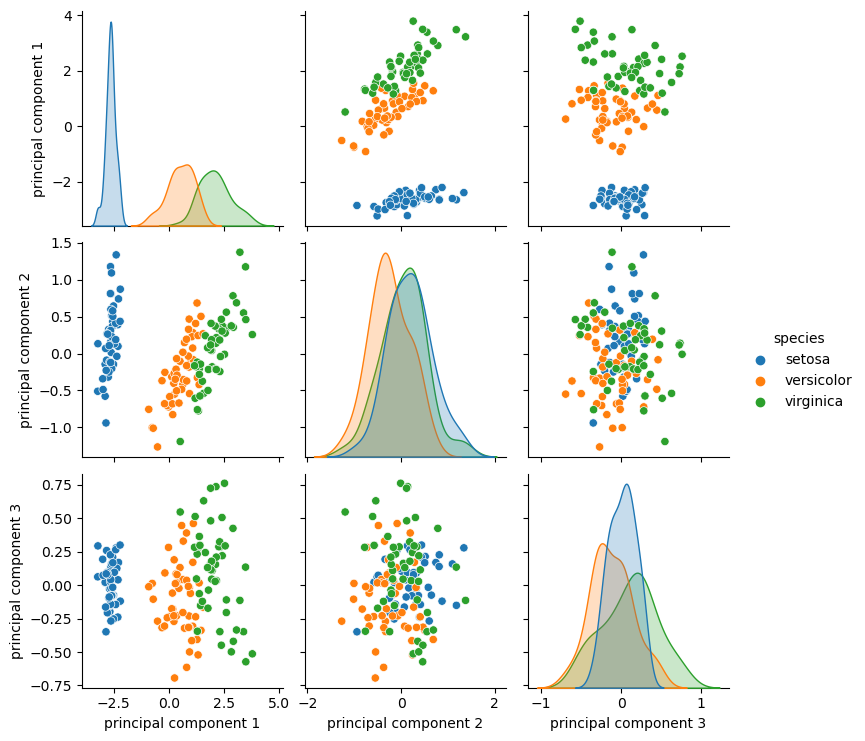

In [8]:
plt.figure(figsize=(10, 8))
sns.pairplot(finalDf, hue="species", vars=['principal component 1', 'principal component 2', 'principal component 3'])
plt.show()